# **Лабораторная работа №1. Понятие многомерных данных**

Выбранный мной датасет был создан благодаря исследованию "The National Longitudinal Surveys (NLS)", спонсором которого являлось Бюро статистики труда США.
Начиная с 1983 года, женщин, участвующих в исследовании, спрашивали о любых беременностях, которые произошли с момента их последнего опроса (беременности до 1983 года также документировались). В анкету включены вопросы о грудном вскармливании.
Этот набор данных состоит из информации от 927 детей, родившихся первыми у матерей, которые решили кормить своих детей грудью и имеют полную информацию по всем интересующим переменным. Выборка была ограничена детьми, родившимися после 1978 года и чей срок беременности составлял от 20 до 45 недель.

Описание датасета: https://vincentarelbundock.github.io/Rdatasets/doc/KMsurv/bfeed.html

Книга, описывающая исследование: https://sistemas.fciencias.unam.mx/~ediaz/Cursos/Estadistica3/Libros/0a9X.pdf

Данные являются многомерными, так как каждая запись характеризуется вектором признаков, описывающих особенности и параметры кормления каждой конкретной матери.

**Описание данных**

* **duration** - Продолжительность грудного вскармливания (нед.). *Количественная*.

* **delta** - Индикатор завершения грудного вскармливания (1=да, 0=нет). *Категориальный*

* **race** - Раса матери (1=белая, 2=черная, 3=другая). *Категориальный*

* **poverty** - Мать в бедности (1=да, 0=нет). *Категориальный*

* **smoke** - Мать курила при рождении ребенка (1=да, 0=нет). *Категориальный*

* **alcohol** - Мать употребляла алкоголь при рождении ребенка (1=да, 0=нет). *Категориальный*

* **agemth** - Возраст матери при рождении ребенка. *Количественный*

* **ybirth** - Год рождения ребенка. *Количественный*

* **yschool** - Уровень образования матери (годы обучения). *Количественный*

* **pc3mth** - Дородовой уход после 3-го месяца (1=да, 0=нет). *Категориальный*

In [1]:
import os

import numpy as np
import pandas as pd
import pandas_profiling

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import missingno as msno

warnings.filterwarnings('ignore')

In [3]:
# Чтение данных
df = pd.read_csv('/content/bfeed.csv')

In [4]:
# Первые 5 записей
df.head(5)

,Unnamed: 0,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
0,1,16,1,1,0,0,1,24,82,14,0
1,2,1,1,1,0,1,0,26,85,12,0
2,3,4,0,1,0,0,0,25,85,12,0
3,4,3,1,1,0,1,1,21,85,9,0
4,5,36,1,1,0,1,0,22,82,12,0


In [5]:
# Последние 5 записей
df.tail(5)

,Unnamed: 0,duration,delta,race,poverty,smoke,alcohol,agemth,ybirth,yschool,pc3mth
922,923,24,1,1,0,0,0,20,80,12,0
923,924,4,1,1,0,0,0,20,79,12,0
924,925,5,1,1,0,0,1,22,81,12,0
925,926,24,1,2,0,0,0,21,80,12,0
926,927,6,1,1,0,1,0,20,80,12,0


In [6]:
# Структура данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  927 non-null    int64
 1   duration    927 non-null    int64
 2   delta       927 non-null    int64
 3   race        927 non-null    int64
 4   poverty     927 non-null    int64
 5   smoke       927 non-null    int64
 6   alcohol     927 non-null    int64
 7   agemth      927 non-null    int64
 8   ybirth      927 non-null    int64
 9   yschool     927 non-null    int64
 10  pc3mth      927 non-null    int64
dtypes: int64(11)
memory usage: 79.8 KB


In [7]:
# Проверка на пропущенные значения
df.isna().sum()

Unnamed: 0    0
duration      0
delta         0
race          0
poverty       0
smoke         0
alcohol       0
agemth        0
ybirth        0
yschool       0
pc3mth        0
dtype: int64

<Axes: >

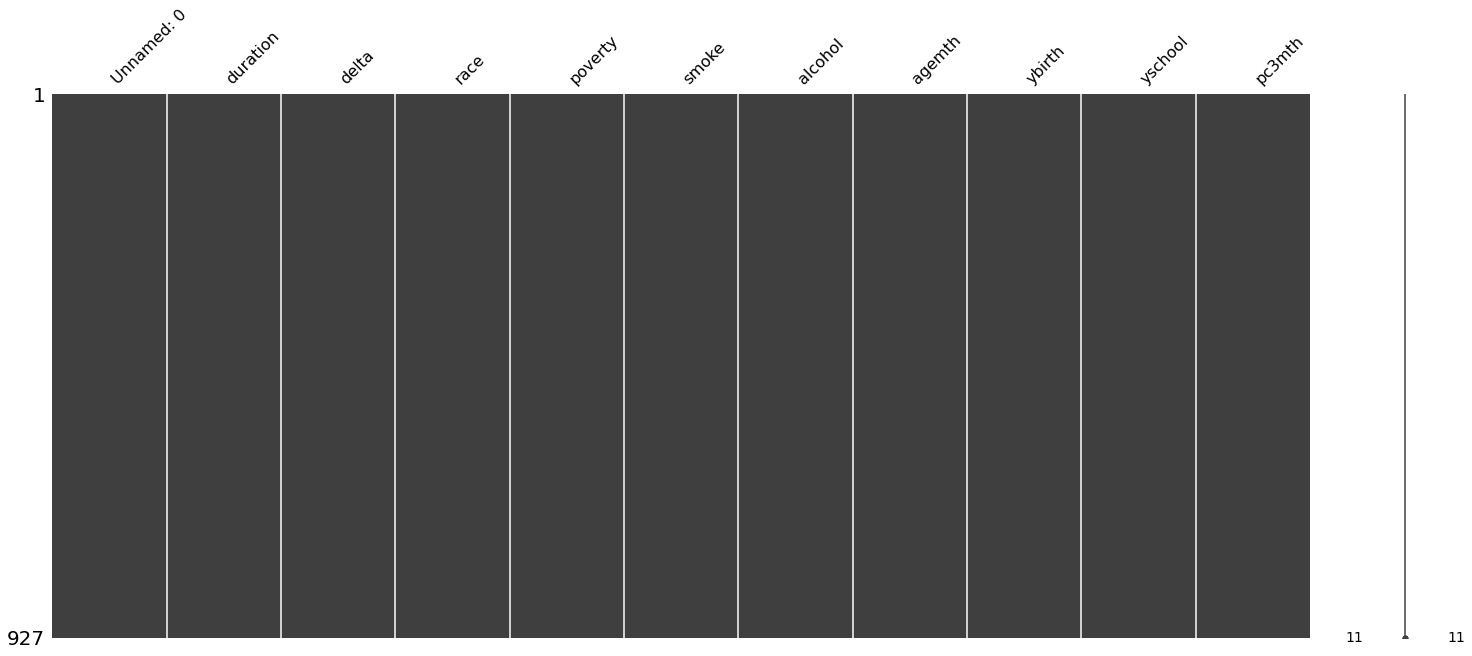

In [8]:
msno.matrix(df)

Датасет не содержит пустых значений.
Если бы они имелись, нужны были действия по их обработке:
*   Замена пропущенный значений (средним или медианой для количественных данных, самым састовстречаемым для категориальных)
*   Удаление записей с пропусками
*   Удаление признаков с большим числом пропусков





**Выводы:**
Датасет содержит 10 признаков, 4 из которых количественные, остальные - категориальные. 

Дальнейшее исследование не предполагает:
*   Обработку пропусков
*   Интеграцию данных
*   Преобразование данных
*   Перебалансировку данных

На основе уже имеющейся информации, предположу, что длительность кормления грудью,  как фактор, зависящий от состояния здоровья матери, должен значительно коррелировать с признаками ***smoke*** и ***alcohol***. В дальнейшем исследовании уделим особое внимание подверждению этой гипотезы.